# Exercise 1

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import split_dataset
from sklearn.model_selection import train_test_split

2023-09-06 01:19:39.005953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 01:19:39.883035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('./bodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


## Preprocessing

In [3]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.duplicated().any()

False

In [6]:
X = df.drop(['BodyFat'], axis=1)
y = df.BodyFat

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
xtensor = tf.convert_to_tensor(X_train)
xtensor.shape

2023-09-06 01:19:42.050169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-06 01:19:42.247287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-06 01:19:42.247375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-06 01:19:42.255377: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-06 01:19:42.255473: I tensorflow/compile

TensorShape([201, 14])

In [12]:
model = Sequential([
    Input(shape=(14,)),
    Dense(128,  activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear'),
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['accuracy'])

In [14]:
epochs = 100
batch_size = 32
obj = model.fit(tf.convert_to_tensor(X_train), tf.convert_to_tensor(y_train), epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/100


2023-09-06 01:20:42.944760: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x9aab300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-06 01:20:42.944857: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-09-06 01:20:42.984645: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-06 01:20:43.075373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-06 01:20:43.488177: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-06 01:20:43.674104: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 [==============================] - 3s 47ms/step - loss: 849021.0000 - accuracy: 0.0056 - val_loss: 194.1904 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 138.4621 - accuracy: 0.0000e+00 - val_loss: 191.6068 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 114.3349 - accuracy: 0.0000e+00 - val_loss: 173.6093 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 95.3520 - accuracy: 0.0000e+00 - val_loss: 166.1104 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 121.7081 - accuracy: 0.0000e+00 - val_loss: 177.4932 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 116.0079 - accuracy: 0.0000e+00 - val_loss: 102.2518 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 68.4925 - accuracy: 0.0000e+00

In [15]:
loss, acc = model.evaluate(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test))
loss, acc

2/2 [==============================] - 0s 10ms/step - loss: 31.9316 - accuracy: 0.0000e+00


(31.931621551513672, 0.0)

In [16]:
rmse = np.sqrt(obj.history['loss'])
rmse

array([921.42335547,  11.76699315,  10.69275166,   9.76483591,
        11.03214007,  10.77069442,   8.2760219 ,   7.30676932,
         6.84169874,   6.91820834,   6.79218027,   6.76305201,
         6.53468838,   7.05963725,   6.86876659,   6.46540577,
         6.28277357,   5.52488213,   5.2993432 ,   4.93021019,
         5.04297556,   4.8315461 ,   5.09246398,   5.69875923,
         5.66261835,   6.0081268 ,   5.91583121,   5.60241948,
         4.98914245,   4.86700625,   5.59512909,   6.22488086,
         6.66678756,   5.79775805,   5.35084233,   5.16935885,
         5.31154094,   5.20995682,   4.95043622,   4.7821437 ,
         4.62945095,   5.02851329,   5.48598185,   4.69261806,
         5.43699258,   6.28701533,   5.12250737,   5.29092478,
         4.79662568,   4.57594659,   4.50283237,   5.03714024,
         4.71721296,   6.13012481,   6.00204783,   5.64185267,
         5.27148528,   4.8840186 ,   4.57491067,   4.60707516,
         4.56686548,   5.26011084,   5.85140474,   5.03

## Performance tabulation

In [17]:
pd.DataFrame({"epochs": range(1, epochs + 1), "rmse": rmse})

,epochs,rmse
0,1,921.423355
1,2,11.766993
2,3,10.692752
3,4,9.764836
4,5,11.032140
...,...,...
95,96,5.193550
96,97,5.098872
97,98,5.156994
98,99,4.564523


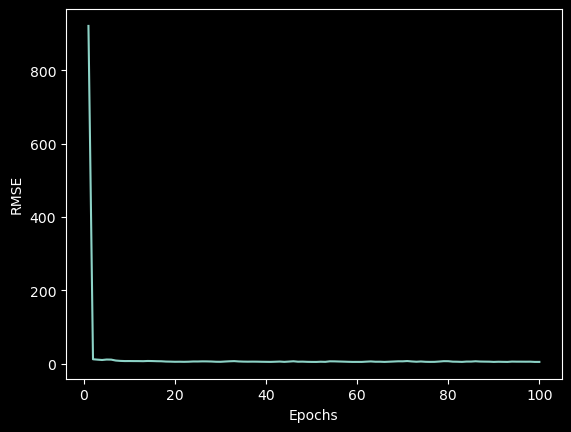

In [18]:
# For all losses
fig = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.plot(range(1, epochs + 1), rmse)

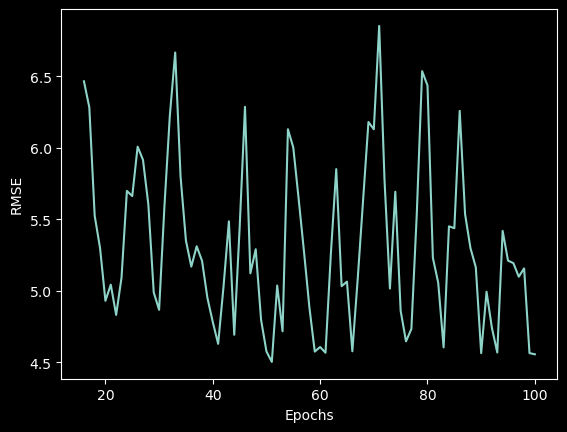

In [19]:
# Removing 1st 15 losses for better representation of fluctuating loss
fig = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.plot(range(16, epochs + 1), rmse[15:])